In [1]:
import numpy as np
import matplotlib.pyplot as plt

My tartan is as follows:

In [2]:
mytartan = 50258468%31
mytartan

28

This `comb_str` combines stringifyed integers and combines into one integer. The input is a list of integers as strings.

In [3]:
# This function combines strings in a list into one big string
def comb_str(lizst):
    c=""
# iterate over character lists and combines each char in lizst to form a new concatenated string 
    for i in lizst: 
        c += i
    return c

comb_str(['1', '4'])

'14'

The `deconstruct_pattern` function takes a pattern of colors and widths and creates tuples with the colors in the first index and widths in the second index.

In [4]:
# This function will separate the characters by integers and letters into separate lists
def deconstruct_pattern(data): # Input is the color-width data in the form of a list
    data = data.split(" ")
    tups_list = []
# Iterates over each character in a string
    for i in data:
        if_let = []
        if_digit = []
        for strs in i:
    # If the character is a digit
            if strs.isdigit(): 
            # Add the digit to the ints list
                if_digit.append(strs)
        # If its not a digit, but a letter
            else:
                # Add that letter into the letters list
                if_let.append(strs)
        tups = (comb_str(if_let),int(comb_str(if_digit)) )
        tups_list.append(tups)
    return tups_list


deconstruct_pattern("K16 Y4 K32 Y48 R4 Y48 K32 Y4 K16")

[('K', 16),
 ('Y', 4),
 ('K', 32),
 ('Y', 48),
 ('R', 4),
 ('Y', 48),
 ('K', 32),
 ('Y', 4),
 ('K', 16)]

The `fix_color` takes a dictionary of RGB coordinates and normalizes them to be between 0 and 1.

In [5]:
def fix_color(dicts):
    for i,j in dicts.items():
        l = []
        for k in j:
            k = k/255
            l.append(k)
            dicts.update({i:l})
    return dicts

color_patt = {"K" : [16, 16, 16],
"R" : [200, 0, 0],
"Y" : [216, 176, 0]}

fix_color(color_patt)

{'K': [0.06274509803921569, 0.06274509803921569, 0.06274509803921569],
 'R': [0.7843137254901961, 0.0, 0.0],
 'Y': [0.8470588235294118, 0.6901960784313725, 0.0]}

The `make_stripe` creates a stripe with a specific color.

In [6]:
def make_stripe(pattern, width, height):
    array = np.ones((height, width, 3))
    for i,j in [(i,j) for i in range(height) for j in range(width)]:
        array[i,j,:] = (pattern[0], pattern[1], pattern[2])
    return array


The `build_vert` function creates the pattern of the tarton concatenating each stripe in a given pattern.

In [7]:
def build_vert(pattern, color_dict, size):
# Fix the dictionary to have RGB coordinates between 0 and 1
    color_dict = fix_color(color_dict)
# Deconstruct Color-Width pattern using the deconstruct_pattern function
    patt = deconstruct_pattern(pattern)
# Initiate first array
    start = np.ones([size,0,3])
# iterate over the pattern and concatenate each strip of colors from the pattern.
    for i in patt:
        strip = make_stripe(color_dict[i[0]],i[1],size)
        start = np.concatenate([start, strip],1)
# If the inputted size is smaller than the width of the pattern, delete some columns to have the size = width
    if size < np.shape(start)[1]:
        start = np.delete(start,range(size,np.shape(start)[1]) ,1)
# If a inputted size is greater than the width of the pattern, concatenate a copy of the pattern & remove columns any
# columns if width > size
    while size > np.shape(start)[1]:
        start = np.concatenate([start,start], 1)
    remainder = np.shape(start)[1] % size
    start = np.delete(start,range(np.shape(start)[1] - remainder, np.shape(start)[1]),1)
    return start


The `build_tartan_without_diagonal` function creates a symbol tartan using alternating horizontal and vertical stripes.

In [126]:
def create_tartan_without_diagonal(array):
    vert = array
    hori = np.transpose(vert, (1,0,2))
    tartan = np.zeros([np.shape(array)[0],np.shape(array)[1],3])
# Iterate over original array, if the sum of of the coordinates (i,j) is even, its a vertical stripe!
    for i, j in [(i,j) for i in range(np.shape(array)[0]) for j in range(np.shape(array)[1])]:
        if (i+j) % 2 == 0:
            tartan[i, j, :] = vert[i,j,:]
        else:
            tartan[i, j, :] = hori[i, j, :]
    return tartan

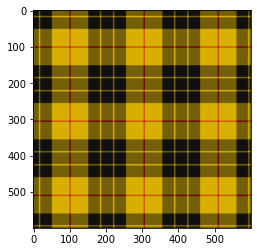

In [141]:
ans = build_vert("K16 Y4 K32 Y48 R4 Y48 K32 Y4 K16",{"K" : [16, 16, 16],"R" : [200, 0, 0],"Y" : [216, 176, 0]}, 600)

plt.imshow(create_tartan_without_diagonal(ans))
plt.show()